In [36]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
#Reading data
data = pd.read_csv('Weld_params_geometry.csv')

In [38]:
#Data preparation
df = data.copy()
df = df.drop('Sl. No.',axis=1)

In [39]:
#Converting categorical features to numerical features
fre_enc=(df.groupby('Material').size())/len(df)
df['Material'] = df['Material'].apply(lambda x: fre_enc[x])

In [40]:
#Checking for interdrpendecy of features
df.corr()

,Material,Current (A),Voltage(V),Wire feed spped(m/min),Bead width(mm),Bead Height (mm),Bead Penetration(mm)
Material,1.000000,0.564450,-0.887829,0.202408,-0.081540,0.311091,0.040246
Current (A),0.564450,1.000000,-0.658097,0.105728,0.322389,0.605814,0.607983
Voltage(V),-0.887829,-0.658097,1.000000,-0.155933,0.034628,-0.246803,-0.272103
Wire feed spped(m/min),0.202408,0.105728,-0.155933,1.000000,0.145297,0.212787,0.281343
Bead width(mm),-0.081540,0.322389,0.034628,0.145297,1.000000,0.007262,0.590539
Bead Height (mm),0.311091,0.605814,-0.246803,0.212787,0.007262,1.000000,0.286711
Bead Penetration(mm),0.040246,0.607983,-0.272103,0.281343,0.590539,0.286711,1.000000


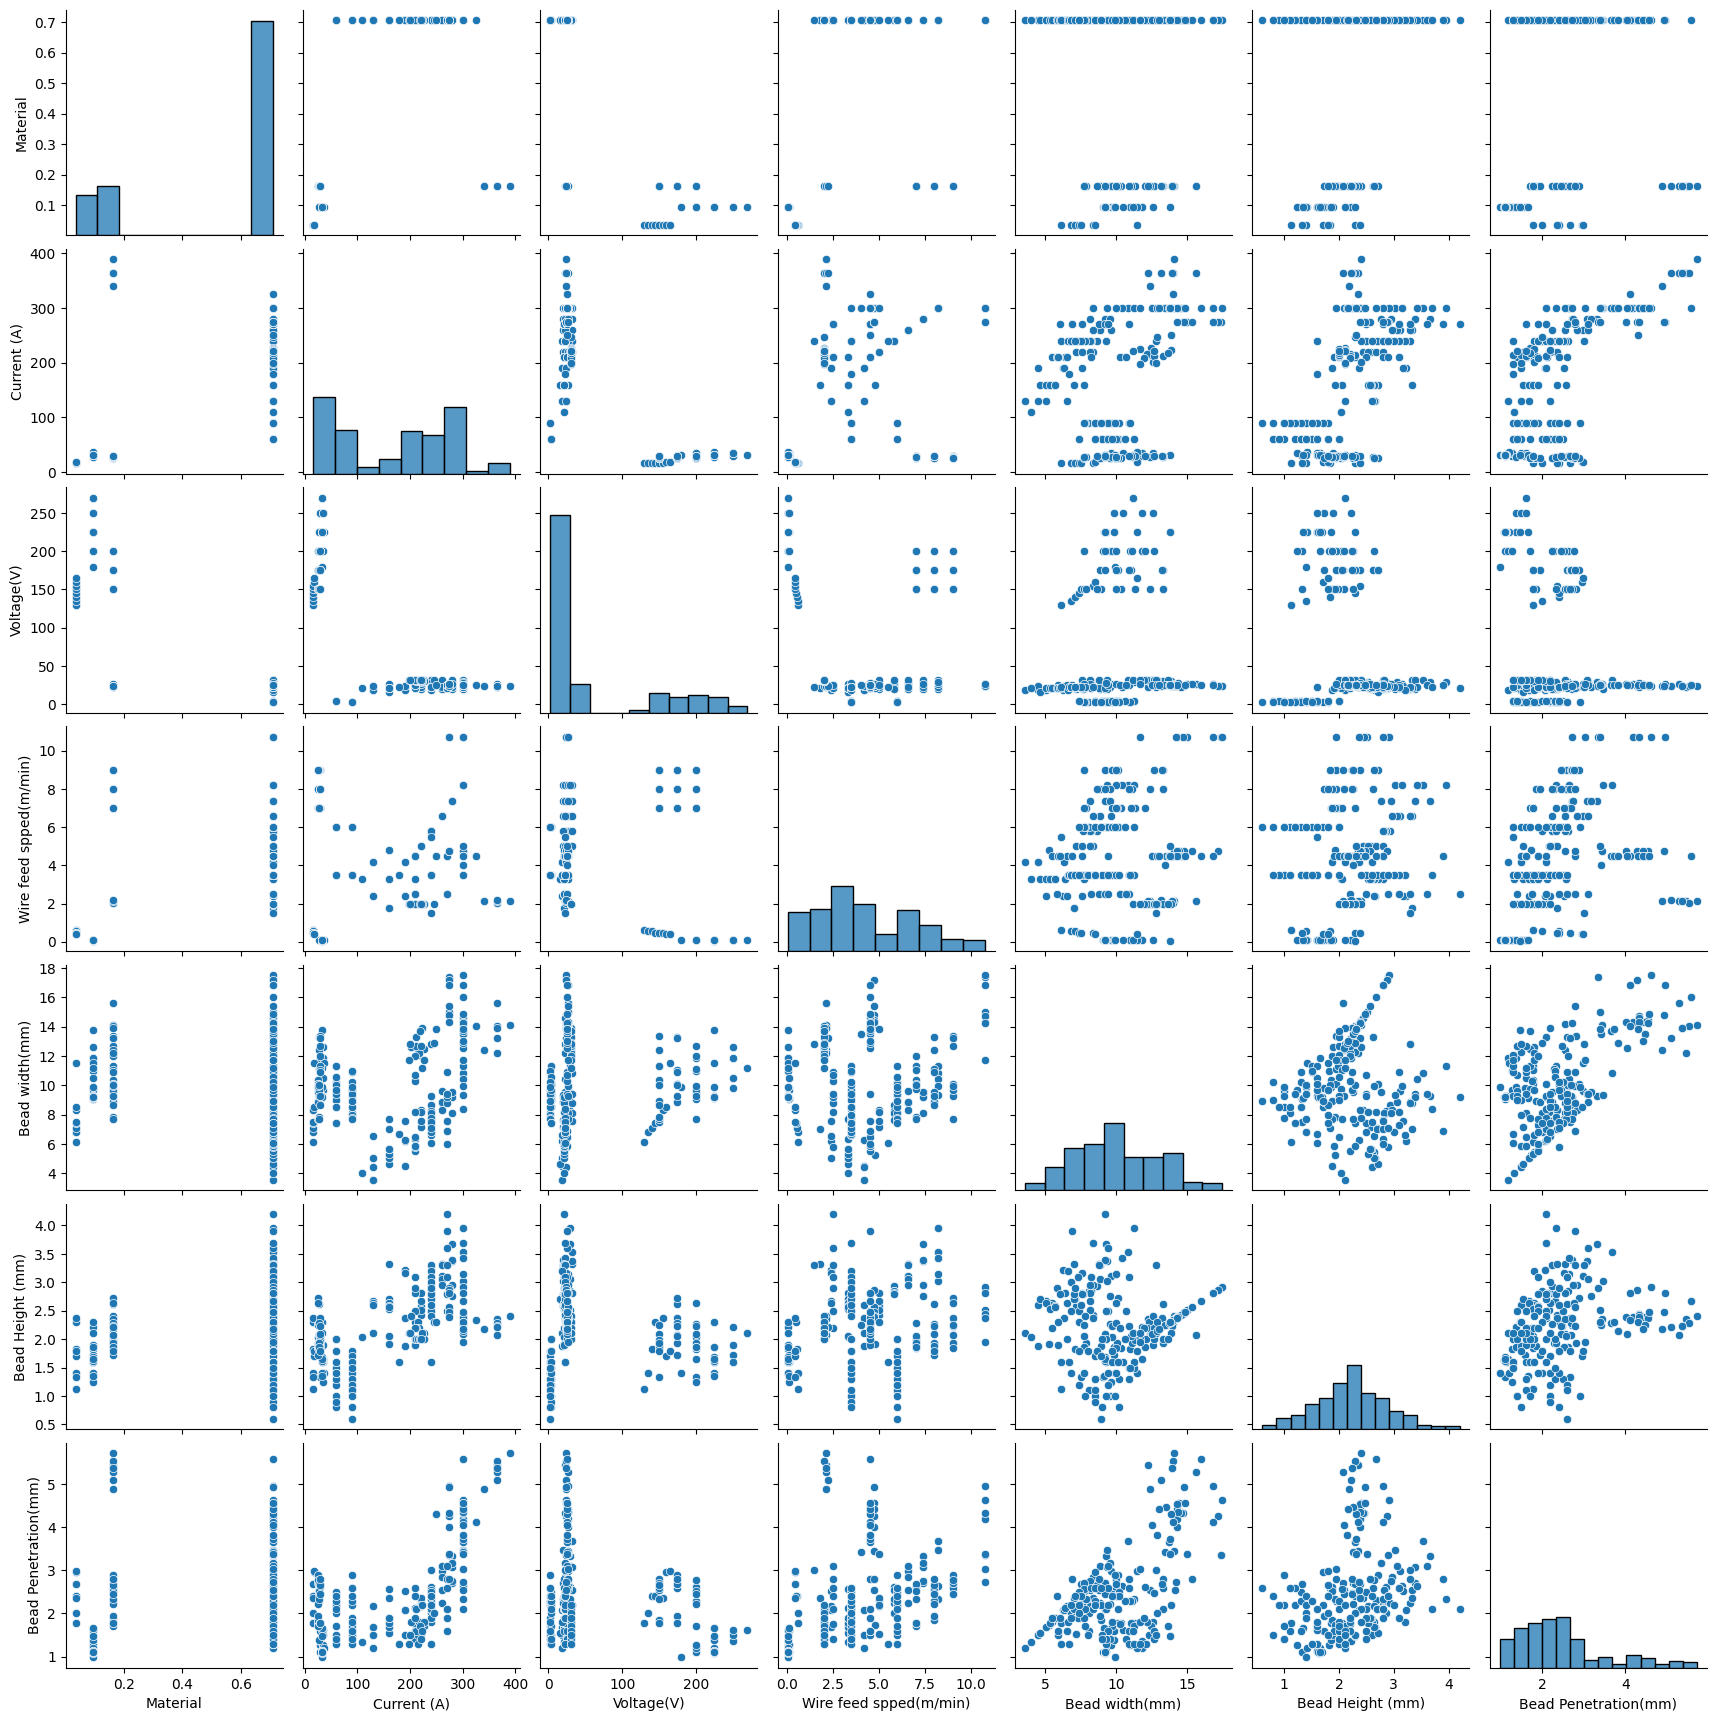

In [41]:
#Data visualisation
sns.pairplot(df)

In [42]:
#Splitting the data
x = df.iloc[:,:-3]
y= df.iloc[:,-3:]

In [43]:
#Data standardisation
for i in x.columns:
  x[i] = (x[i]-x[i].min())/(x[i].max()-x[i].min())
  x[i] = (x[i]-x[i].mean())/x[i].std()

<ipython-input-43-ec12ef786ee6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = (x[i]-x[i].min())/(x[i].max()-x[i].min())
<ipython-input-43-ec12ef786ee6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = (x[i]-x[i].mean())/x[i].std()


In [44]:
#Splitting the data to test and train data
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.2,random_state=1)

In [45]:
#Data scaling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
xtr = sc.fit_transform(xtr)
xte=sc.transform(xte)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU

In [47]:
reg =Sequential()
reg.add(Dense(3,input_shape=(4,),activation='LeakyReLU'))
reg.add(Dense(units=89,activation='LeakyReLU'))
reg.add(Dense(units=89,activation='LeakyReLU'))
reg.add(Dense(units=89,activation='LeakyReLU'))
reg.add(Dense(3))

reg.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['mean_squared_error'])

In [48]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [49]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'mean_squared_error',
    min_delta = 0.0001,
    patience = 40,
    verbose = 1,
    mode ='auto',
    baseline = None,
    restore_best_weights = False
)

In [50]:
#Training the model
model_history = reg.fit(xtr,ytr,validation_data = (xte,yte),batch_size = 10, epochs = 400,callbacks = early_stopping)

Epoch 1/400
18/18 [==============================] - 3s 17ms/step - loss: 38.4691 - mean_squared_error: 38.4691 - val_loss: 26.8777 - val_mean_squared_error: 26.8777
Epoch 2/400
18/18 [==============================] - 0s 6ms/step - loss: 23.4023 - mean_squared_error: 23.4023 - val_loss: 10.6854 - val_mean_squared_error: 10.6854
Epoch 3/400
18/18 [==============================] - 0s 5ms/step - loss: 9.9516 - mean_squared_error: 9.9516 - val_loss: 6.2408 - val_mean_squared_error: 6.2408
Epoch 4/400
18/18 [==============================] - 0s 6ms/step - loss: 6.1207 - mean_squared_error: 6.1207 - val_loss: 4.2371 - val_mean_squared_error: 4.2371
Epoch 5/400
18/18 [==============================] - 0s 6ms/step - loss: 4.3821 - mean_squared_error: 4.3821 - val_loss: 3.1697 - val_mean_squared_error: 3.1697
Epoch 6/400
18/18 [==============================] - 0s 6ms/step - loss: 3.3707 - mean_squared_error: 3.3707 - val_loss: 2.5902 - val_mean_squared_error: 2.5902
Epoch 7/400
18/18 [======

In [51]:
y_pred = reg.predict(xte)
from sklearn.metrics import r2_score
cm = r2_score(yte,y_pred)

2/2 [==============================] - 0s 5ms/step


In [52]:
cm

0.5570951983475544

In [53]:
from sklearn.metrics import mean_absolute_error

In [54]:
mae = mean_absolute_error(yte,y_pred)

In [55]:
mae

0.6509986778329919

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mse=mean_squared_error(yte,y_pred)

In [58]:
mse

1.0688169345661553

To check for bead geometry and change the parameters of welding parameters for better bead geometry

In [59]:
pen=df['Bead Penetration(mm)']
ht =df['Bead Height (mm)']
wi = df['Bead width(mm)']

In [60]:
x = df.iloc[:,-3:]
y = df['Current (A)']
#Model to predict the corrected current parameter for requried bead geometry
reg_i=Sequential()

Splitting the data to train and test 
Training the model for requirement

In [61]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.2,random_state=1)
sc =StandardScaler()
xtr = sc.fit_transform(xtr)
xte=sc.transform(xte)
reg_i.add(Dense(3,input_shape=(3,),activation='LeakyReLU'))
reg_i.add(Dense(units=89,activation='LeakyReLU'))
reg_i.add(Dense(units=89,activation='LeakyReLU'))
reg_i.add(Dense(units=89,activation='LeakyReLU'))
reg_i.add(Dense(1,activation='linear'))
reg_i.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['mean_squared_error'])
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
model_history_i = reg_i.fit(xtr,ytr,validation_data = (xte,yte),batch_size = 10, epochs = 400,callbacks = early_stopping)



Epoch 1/400
18/18 [==============================] - 2s 14ms/step - loss: 42482.0625 - mean_squared_error: 42482.0625 - val_loss: 32244.5117 - val_mean_squared_error: 32244.5117
Epoch 2/400
18/18 [==============================] - 0s 6ms/step - loss: 41343.7852 - mean_squared_error: 41343.7852 - val_loss: 30758.1660 - val_mean_squared_error: 30758.1660
Epoch 3/400
18/18 [==============================] - 0s 5ms/step - loss: 37229.1328 - mean_squared_error: 37229.1328 - val_loss: 26903.9141 - val_mean_squared_error: 26903.9141
Epoch 4/400
18/18 [==============================] - 0s 6ms/step - loss: 28122.6641 - mean_squared_error: 28122.6641 - val_loss: 23279.6855 - val_mean_squared_error: 23279.6855
Epoch 5/400
18/18 [==============================] - 0s 5ms/step - loss: 18292.4062 - mean_squared_error: 18292.4062 - val_loss: 15856.2012 - val_mean_squared_error: 15856.2012
Epoch 6/400
18/18 [==============================] - 0s 6ms/step - loss: 9255.6074 - mean_squared_error: 9255.6074

In [62]:
#Data preparation to coorect other parameters
dn = df.copy()
x1=x.copy()
x1['Curent'] = dn['Current (A)']
x1['Material'] = dn['Material']
#x1["Time"] = dn['time(ms)']

In [63]:
y1 = df.iloc[:,:-3].drop(['Current (A)','Material'],axis=1)

In [64]:
#Model to predict required parameters
reg_p=Sequential()
xtr,xte,ytr,yte = train_test_split(x1,y1,test_size=0.2,random_state=1)
sc =StandardScaler()
xtr = sc.fit_transform(xtr)
xte=sc.transform(xte)
reg_p.add(Dense(89,input_shape=(5,),activation='LeakyReLU'))
reg_p.add(Dense(units=89,activation='LeakyReLU'))
reg_p.add(Dense(units=89,activation='LeakyReLU'))
reg_p.add(Dense(units=89,activation='LeakyReLU'))
reg_p.add(Dense(2))
reg_p.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['mean_squared_error'])
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
model_history_p = reg_p.fit(xtr,ytr,validation_data = (xte,yte),batch_size = 10, epochs = 400,callbacks = early_stopping)

Epoch 1/400
18/18 [==============================] - 2s 14ms/step - loss: 4535.7144 - mean_squared_error: 4535.7144 - val_loss: 6160.9487 - val_mean_squared_error: 6160.9487
Epoch 2/400
18/18 [==============================] - 0s 6ms/step - loss: 4424.0273 - mean_squared_error: 4424.0273 - val_loss: 5811.0322 - val_mean_squared_error: 5811.0322
Epoch 3/400
18/18 [==============================] - 0s 5ms/step - loss: 3947.0168 - mean_squared_error: 3947.0168 - val_loss: 4592.5918 - val_mean_squared_error: 4592.5918
Epoch 4/400
18/18 [==============================] - 0s 6ms/step - loss: 2871.2166 - mean_squared_error: 2871.2166 - val_loss: 2417.5547 - val_mean_squared_error: 2417.5547
Epoch 5/400
18/18 [==============================] - 0s 6ms/step - loss: 1654.9775 - mean_squared_error: 1654.9775 - val_loss: 1139.6763 - val_mean_squared_error: 1139.6763
Epoch 6/400
18/18 [==============================] - 0s 5ms/step - loss: 818.7036 - mean_squared_error: 818.7036 - val_loss: 714.0972 

In [65]:
#Check of bead geometry and change the welding parameters
for i in range(0,len(pen)-1):
  if pen[i] < 0.15*ht[i]:
    h=ht[i]
    p = 0.15*ht[i]
    
    w=wi[i]
    c = df['Current (A)'][i]
    x['Bead Penetration(mm)'][i]=p
    di = {'w':[w],'h':[h],'p':[p]}


    g = pd.DataFrame(di)
    print(g)
    y=reg_i.predict(g)
    
    dn['Current (A)'].iloc[i]=y
    dn['Bead Penetration(mm)'].iloc[i]=p
    m=dn['Material']
    mi=m[i]
    #t=dn['time(ms)']
    #ti=t[i]
    di2={}
    di2 = {'w':[w],'h':[h],'p':[p],'m':[mi],'c':[y[0][0]]}
    print(di2)
    g1=pd.DataFrame(di2)
    y1 = reg_p.predict(g1)
    di3={'r':[y1]}
    print(di3)
    dn['Voltage(V)'][i]=y1[0][0]
    dn['Wire feed spped(m/min)'][i]=y1[0][1]


In [66]:
dn

,Material,Current (A),Voltage(V),Wire feed spped(m/min),Bead width(mm),Bead Height (mm),Bead Penetration(mm)
0,0.707207,220.0,20.0,5.0,7.17,2.59,1.536
1,0.707207,220.0,23.0,5.0,8.17,2.68,2.312
2,0.707207,220.0,26.0,5.0,8.35,2.43,2.348
3,0.707207,220.0,29.0,5.0,8.15,2.52,2.164
4,0.707207,220.0,32.0,5.0,7.59,2.81,2.194
...,...,...,...,...,...,...,...
217,0.707207,300.0,25.0,4.5,13.73,2.29,3.660
218,0.707207,300.0,25.0,4.5,13.83,2.31,3.720
219,0.707207,300.0,25.0,4.5,12.92,2.15,3.820
220,0.707207,300.0,25.0,4.5,13.03,2.17,4.420


In [113]:
dn.to_csv('Solution.csv',index=False)

In [125]:
test=pd.read_excel('test.xlsx')
df=test.copy()

In [126]:
df

,Material,Current (A),Voltage(V),Wire feed spped(m/min)
0,Mild steel,159,2.515723,4.5
1,Mild steel,67,5.970149,1.7
2,Mild steel,100,4.000000,2.6
3,Mild steel,120,3.333333,3.2


In [127]:
df["Material"] = 0.308642

In [128]:
df

,Material,Current (A),Voltage(V),Wire feed spped(m/min)
0,0.308642,159,2.515723,4.5
1,0.308642,67,5.970149,1.7
2,0.308642,100,4.000000,2.6
3,0.308642,120,3.333333,3.2


In [130]:
df

,Material,Current (A),Voltage(V),Wire feed spped(m/min)
0,0.308642,159,2.515723,4.5
1,0.308642,67,5.970149,1.7
2,0.308642,100,4.000000,2.6
3,0.308642,120,3.333333,3.2


In [131]:
df = sc.fit_transform(df)

In [132]:
pred=reg.predict(df)
pred=pd.DataFrame(pred)
pred

1/1 [==============================] - 0s 18ms/step


,0,1,2
0,10.503720,3.182929,3.090374
1,11.681138,1.233949,1.591764
2,4.747257,2.432444,1.519530
3,7.581109,2.581431,1.937231


In [133]:
pred.to_csv('Solution_test.csv',index=False)